# Analysis of Hawk/dove multiple risk attitudes with adjustment 


Analysis of parameter correlation with population risk attitudes.


In [40]:
import pandas as pd
import glob

df = pd.read_csv("../../data/hawkdovemulti/job_task_2024-02-07T064022_648635_model.csv")

In [41]:
df.head()

,RunId,iteration,Step,grid_size,risk_adjustment,play_neighborhood,observed_neighborhood,adjust_neighborhood,hawk_odds,adjust_every,...,total_r0,total_r1,total_r2,total_r3,total_r4,total_r5,total_r6,total_r7,total_r8,total_r9
0,6,0,31,10,adopt,8,8,8,0.5,2,...,0,7,6,10,17,10,14,10,18,8
1,8,0,53,10,adopt,8,8,8,0.5,2,...,35,9,6,2,0,0,0,6,15,27
2,7,0,65,10,adopt,8,8,8,0.5,2,...,0,8,31,4,19,7,31,0,0,0
3,4,0,60,10,adopt,8,8,8,0.5,2,...,10,15,24,15,12,9,9,2,1,3
4,12,0,61,10,adopt,8,8,8,0.5,10,...,2,7,7,37,11,16,13,5,2,0


In [42]:
df.columns

Index(['RunId', 'iteration', 'Step', 'grid_size', 'risk_adjustment',
       'play_neighborhood', 'observed_neighborhood', 'adjust_neighborhood',
       'hawk_odds', 'adjust_every', 'risk_distribution', 'adjust_payoff',
       'max_agent_points', 'percent_hawk', 'rolling_percent_hawk', 'status',
       'total_agents', 'population_risk_category', 'total_r0', 'total_r1',
       'total_r2', 'total_r3', 'total_r4', 'total_r5', 'total_r6', 'total_r7',
       'total_r8', 'total_r9'],
      dtype='object')

In [43]:
# calculate percentages for each risk attitude

for i in range(0, 10):
    df[f'pct_r{i}'] = df.apply(lambda row: row[f'total_r{i}'] / row.total_agents, axis=1)

df.head()


,RunId,iteration,Step,grid_size,risk_adjustment,play_neighborhood,observed_neighborhood,adjust_neighborhood,hawk_odds,adjust_every,...,pct_r0,pct_r1,pct_r2,pct_r3,pct_r4,pct_r5,pct_r6,pct_r7,pct_r8,pct_r9
0,6,0,31,10,adopt,8,8,8,0.5,2,...,0.00,0.07,0.06,0.10,0.17,0.10,0.14,0.10,0.18,0.08
1,8,0,53,10,adopt,8,8,8,0.5,2,...,0.35,0.09,0.06,0.02,0.00,0.00,0.00,0.06,0.15,0.27
2,7,0,65,10,adopt,8,8,8,0.5,2,...,0.00,0.08,0.31,0.04,0.19,0.07,0.31,0.00,0.00,0.00
3,4,0,60,10,adopt,8,8,8,0.5,2,...,0.10,0.15,0.24,0.15,0.12,0.09,0.09,0.02,0.01,0.03
4,12,0,61,10,adopt,8,8,8,0.5,10,...,0.02,0.07,0.07,0.37,0.11,0.16,0.13,0.05,0.02,0.00


In [44]:
# calculate percentages for each risk grouping

#  Risk-inclined (RI) : r = 0, 1, 2
#  Risk-moderate (RM): r = 3, 4, 5, 6
#  Risk-avoidant (RA): r = 7, 8, 9

df['pct_risk_inclined'] = df.apply(lambda row: (row.total_r0 + row.total_r1 + row.total_r2) / row.total_agents, axis=1)
df['pct_risk_moderate'] = df.apply(lambda row: (row.total_r3 + row.total_r4 + row.total_r5 + row.total_r6) / row.total_agents, axis=1)
df['pct_risk_avoidant'] = df.apply(lambda row: (row.total_r7 + row.total_r8 + row.total_r9) / row.total_agents, axis=1)


df[['pct_r0', 'pct_r1', 'pct_risk_inclined', 'pct_risk_moderate', 'pct_risk_avoidant']].head(10)


,pct_r0,pct_r1,pct_risk_inclined,pct_risk_moderate,pct_risk_avoidant
0,0.00,0.07,0.13,0.51,0.36
1,0.35,0.09,0.50,0.02,0.48
2,0.00,0.08,0.39,0.61,0.00
3,0.10,0.15,0.49,0.45,0.06
4,0.02,0.07,0.16,0.77,0.07
5,0.00,0.06,0.09,0.37,0.54
6,0.06,0.13,0.20,0.77,0.03
7,0.00,0.21,0.28,0.71,0.01
8,0.14,0.66,0.88,0.12,0.00
9,0.00,0.11,0.17,0.83,0.00


In [45]:
from sklearn import linear_model

# independent variables
grid_size = df[['grid_size']]
# dependent variable
pct_risk_inclined = df['pct_risk_inclined']


regr = linear_model.LinearRegression()
regr.fit(grid_size, pct_risk_inclined)

print("Coefficients: \n", regr.coef_)

Coefficients: 
 [-0.00155227]


In [46]:
_pred = regr.predict(df[['grid_size']])


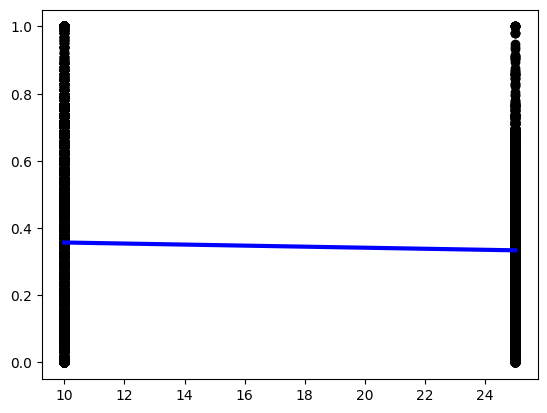

In [47]:
import matplotlib.pyplot as plt


plt.scatter(grid_size, pct_risk_inclined, color="black")
plt.plot(grid_size, _pred, color="blue", linewidth=3)
plt.show()

<Axes: >

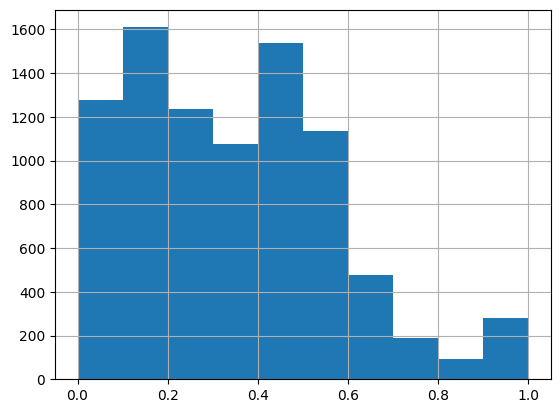

In [48]:
df.pct_risk_inclined.hist()

<Axes: >

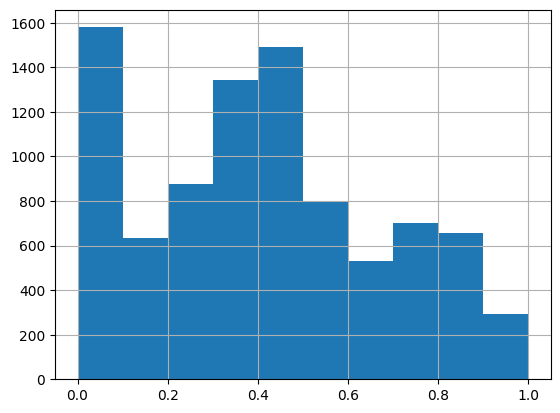

In [49]:
df.pct_risk_moderate.hist()

<Axes: >

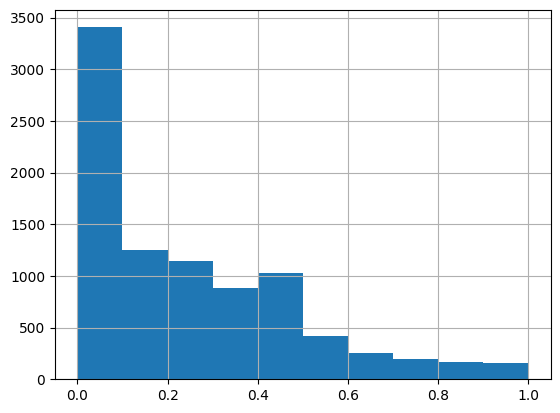

In [50]:
df.pct_risk_avoidant.hist()

In [51]:
df.columns

Index(['RunId', 'iteration', 'Step', 'grid_size', 'risk_adjustment',
       'play_neighborhood', 'observed_neighborhood', 'adjust_neighborhood',
       'hawk_odds', 'adjust_every', 'risk_distribution', 'adjust_payoff',
       'max_agent_points', 'percent_hawk', 'rolling_percent_hawk', 'status',
       'total_agents', 'population_risk_category', 'total_r0', 'total_r1',
       'total_r2', 'total_r3', 'total_r4', 'total_r5', 'total_r6', 'total_r7',
       'total_r8', 'total_r9', 'pct_r0', 'pct_r1', 'pct_r2', 'pct_r3',
       'pct_r4', 'pct_r5', 'pct_r6', 'pct_r7', 'pct_r8', 'pct_r9',
       'pct_risk_inclined', 'pct_risk_moderate', 'pct_risk_avoidant'],
      dtype='object')

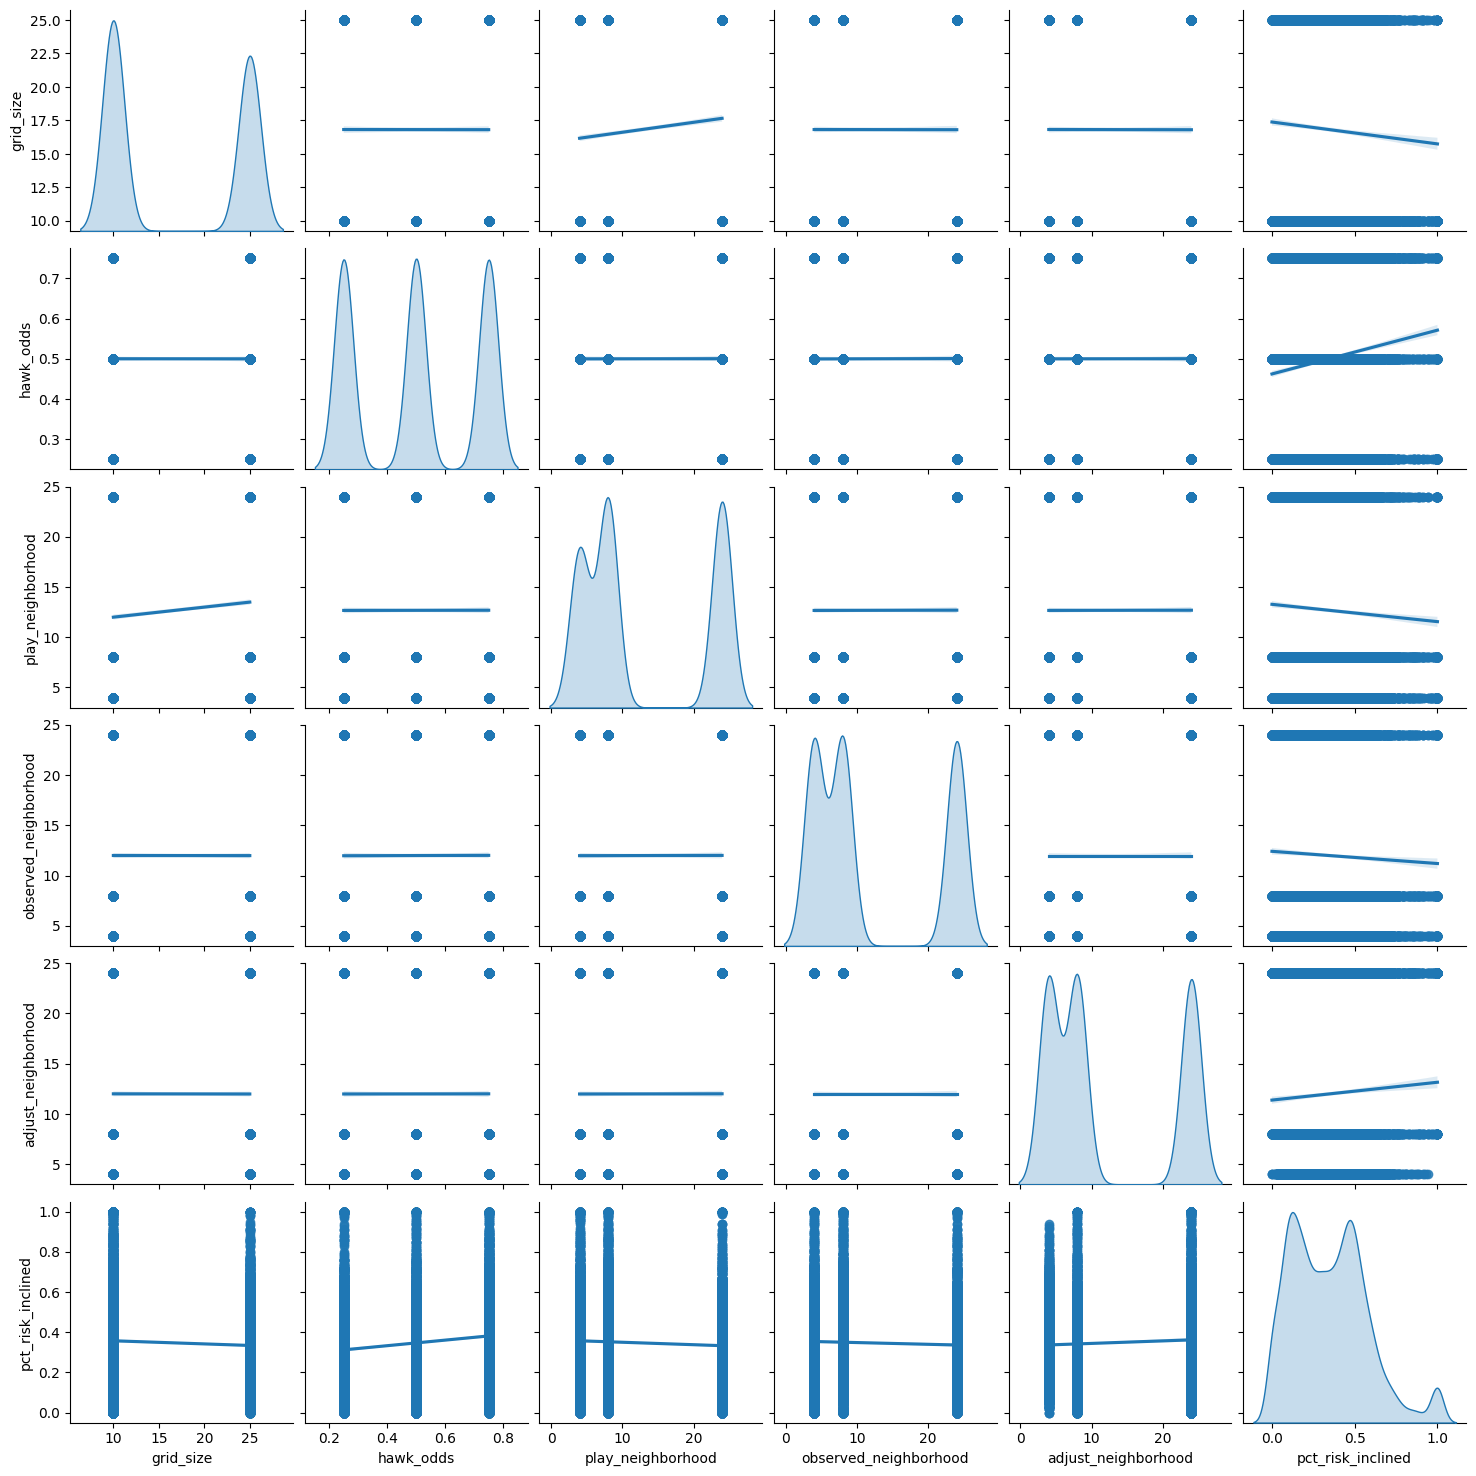

In [52]:
import seaborn as sns

# do a pair plot on a subset of numeric columns that might correlate to population results

df_compare = df[['grid_size', 'risk_adjustment', 'hawk_odds', 'play_neighborhood', 'observed_neighborhood', 'adjust_neighborhood', 'pct_risk_inclined']]

_ = sns.pairplot(df_compare, kind="reg", diag_kind="kde")

In [53]:
# from the pair plot, one of the few that looks like it might be interesting is hawk odds

hawk_odds = df[['hawk_odds']]

hawkodds_regr = linear_model.LinearRegression()
hawkodds_regr.fit(hawk_odds, pct_risk_inclined)

print("Coefficients: \n", regr.coef_)

Coefficients: 
 [-0.00155227]


In [54]:
hawkodds_pred = hawkodds_regr.predict(hawk_odds)
hawkodds_pred

array([0.34652343, 0.34652343, 0.34652343, ..., 0.38121947, 0.3118274 ,
       0.34652343], shape=(8905,))

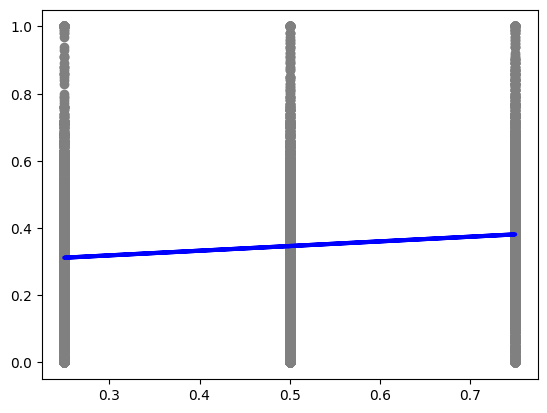

In [55]:
plt.scatter(hawk_odds, pct_risk_inclined, color="gray")
plt.plot(hawk_odds, hawkodds_pred, color="blue", linewidth=3)
plt.show()

In [56]:
# what about adjustment neighborhood?

adjust_nhood = df[['adjust_neighborhood']]

adjust_nhood_regr = linear_model.LinearRegression()
adjust_nhood_regr.fit(adjust_nhood, pct_risk_inclined)

print("Coefficients: \n", adjust_nhood_regr.coef_)

Coefficients: 
 [0.00126239]


In [57]:
adjust_nhood_pred = adjust_nhood_regr.predict(adjust_nhood)
adjust_nhood_pred

array([0.34146791, 0.34146791, 0.34146791, ..., 0.33641833, 0.34146791,
       0.34146791], shape=(8905,))

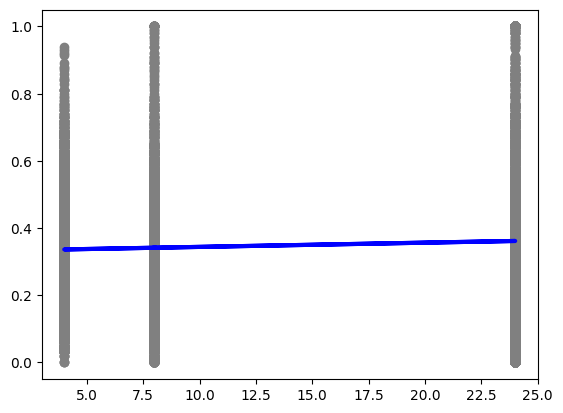

In [58]:
plt.scatter(adjust_nhood, pct_risk_inclined, color="gray")
plt.plot(adjust_nhood, adjust_nhood_pred, color="blue", linewidth=3)
plt.show()

In [59]:
# following along from here:
# https://scikit-learn.org/stable/auto_examples/inspection/plot_linear_model_coefficient_interpretation.html#the-machine-learning-pipeline

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

categorical_columns = ["risk_adjustment", "adjust_payoff", "risk_distribution"]
numerical_columns = ['grid_size', 'hawk_odds', 'play_neighborhood', 'observed_neighborhood', 'adjust_neighborhood']

preprocessor = make_column_transformer(
    (OneHotEncoder(drop="if_binary"), categorical_columns),
    remainder="passthrough",
    verbose_feature_names_out=False,  # avoid to prepend the preprocessor names
)

In [60]:
import numpy as np
import scipy as sp

from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline

model = make_pipeline(
    preprocessor,
    TransformedTargetRegressor(
        # the scikit learn tutorial uses a log function for predicting wages; we're checking for correlation for a % of population, so disable the log scale
        regressor=Ridge(alpha=1e-10), #func=np.log10, inverse_func=sp.special.exp10
    ),
)

In [61]:
# make an input dataset based on the categorical and numerical columns we want to use

df_input = df[categorical_columns + numerical_columns]
# what if we try with only the numerics first?
#df_input = df[numerical_columns]

df_input.head()

,risk_adjustment,adjust_payoff,risk_distribution,grid_size,hawk_odds,play_neighborhood,observed_neighborhood,adjust_neighborhood
0,adopt,recent,skewed right,10,0.5,8,8,8
1,adopt,recent,bimodal,10,0.5,8,8,8
2,adopt,total,skewed right,10,0.5,8,8,8
3,adopt,recent,skewed left,10,0.5,8,8,8
4,adopt,recent,normal,10,0.5,8,8,8


In [62]:
df_input.columns

Index(['risk_adjustment', 'adjust_payoff', 'risk_distribution', 'grid_size',
       'hawk_odds', 'play_neighborhood', 'observed_neighborhood',
       'adjust_neighborhood'],
      dtype='object')

In [63]:
# target for prediction - use percent of population that end up risk inclined;
# using this as a preliminary a stand-in for various population categories for now

target = df['pct_risk_inclined']


In [64]:
from sklearn.model_selection import train_test_split

input_train, input_test, target_train, target_test = train_test_split(df_input, target, random_state=42)

In [65]:
input_train

,risk_adjustment,adjust_payoff,risk_distribution,grid_size,hawk_odds,play_neighborhood,observed_neighborhood,adjust_neighborhood
1951,adopt,recent,uniform,10,0.25,4,24,24
3746,average,recent,bimodal,10,0.50,24,4,8
351,adopt,total,uniform,10,0.75,8,24,8
1511,adopt,total,bimodal,10,0.75,24,4,24
5741,adopt,total,uniform,25,0.50,24,8,24
...,...,...,...,...,...,...,...,...
5734,adopt,total,skewed right,25,0.50,24,8,24
5191,adopt,total,skewed left,25,0.50,8,24,24
5390,adopt,recent,skewed left,25,0.25,8,4,8
860,adopt,total,uniform,10,0.50,24,8,24


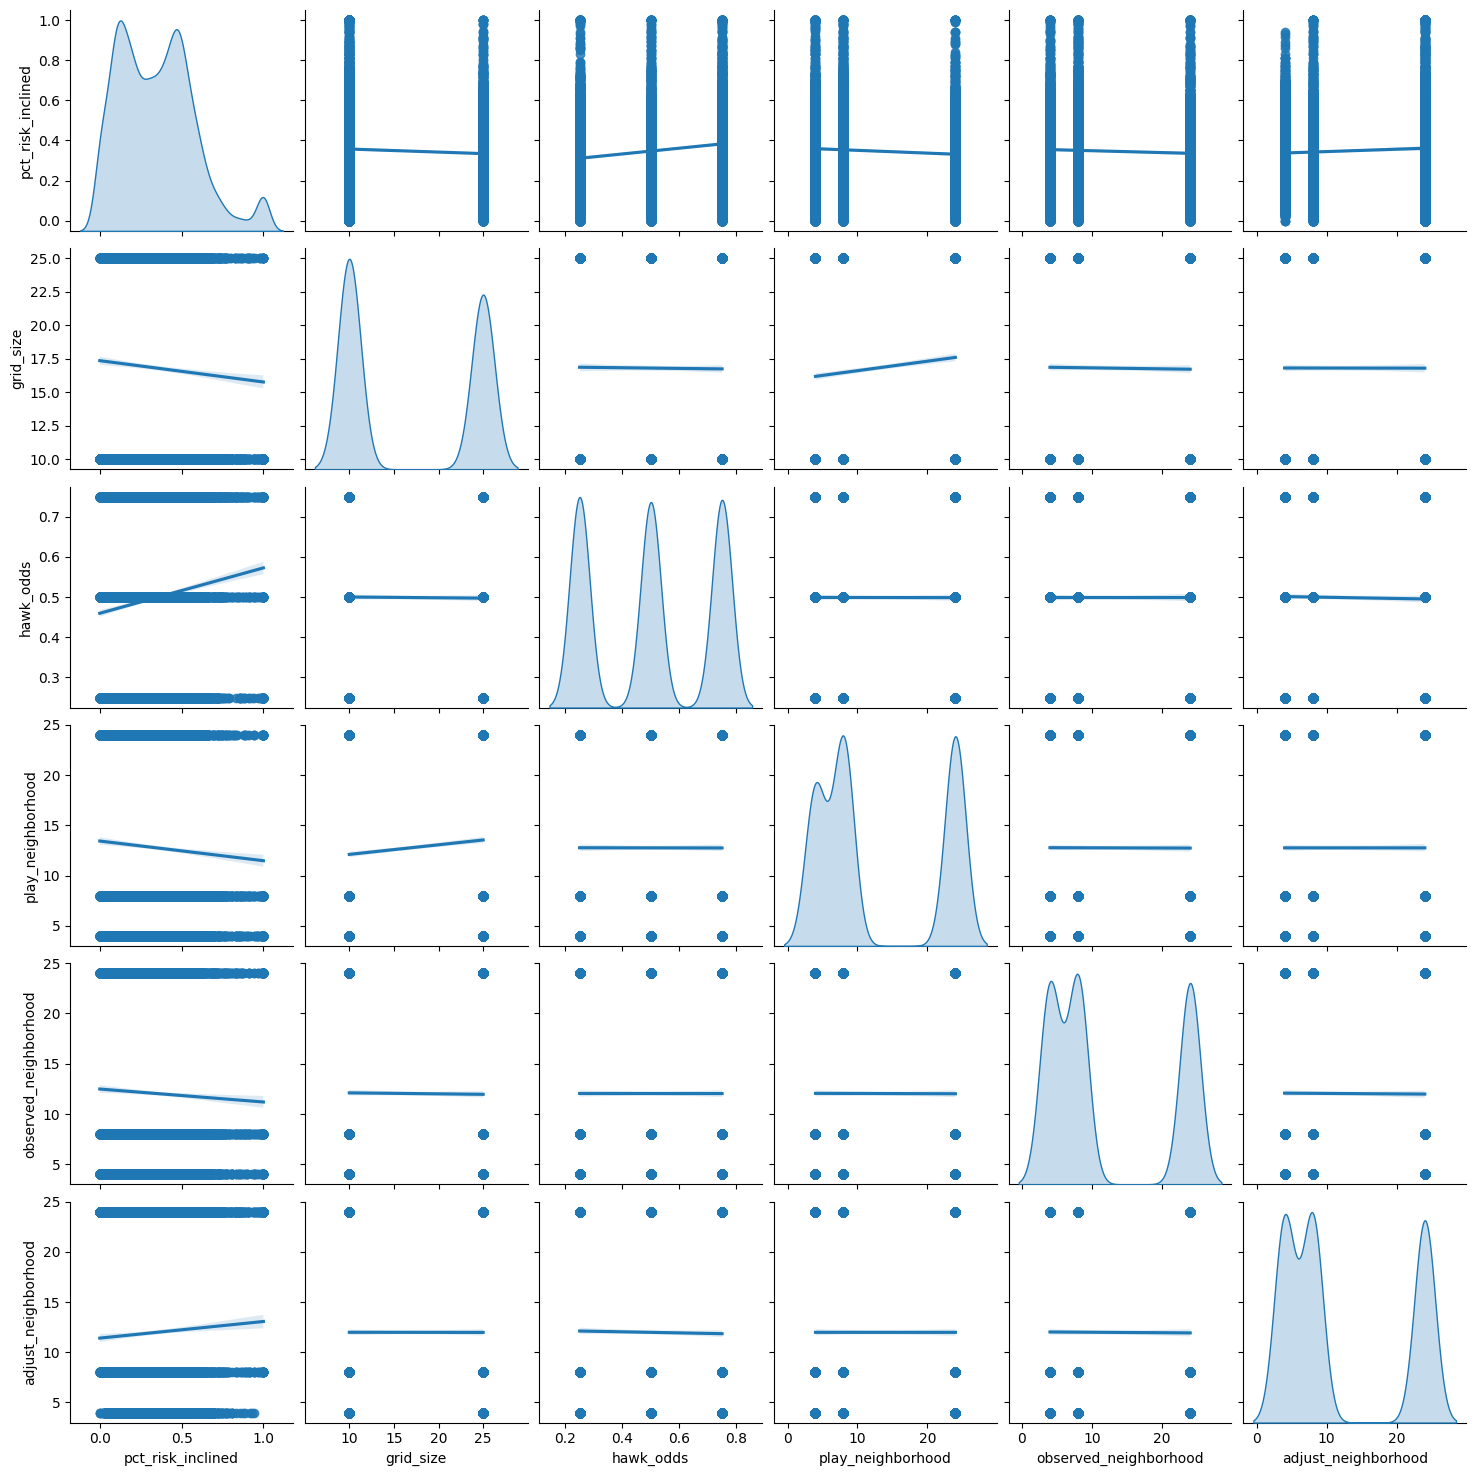

In [66]:
train_dataset = input_train.copy()
train_dataset.insert(0, "pct_risk_inclined", target_train)
# subset to numeric and target only
train_dataset_subset = train_dataset[['pct_risk_inclined', 'grid_size', 'hawk_odds', 'play_neighborhood', 'observed_neighborhood', 'adjust_neighborhood']]
_ = sns.pairplot(train_dataset_subset, kind="reg", diag_kind="kde")

In [67]:
# how many zeroes do we have?
target_train[target_train == 0]

1511    0.0
2918    0.0
1583    0.0
1215    0.0
1129    0.0
       ... 
5249    0.0
5232    0.0
2731    0.0
6863    0.0
161     0.0
Name: pct_risk_inclined, Length: 266, dtype: float64

In [68]:
# fit the model to the training data
model.fit(input_train, target_train)

,steps,"[('columntransformer', ...), ('transformedtargetregressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('onehotencoder', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,False


In [69]:
from sklearn.metrics import PredictionErrorDisplay, median_absolute_error

mae_train = median_absolute_error(target_train, model.predict(input_train))
target_pred = model.predict(input_test)
mae_test = median_absolute_error(target_test, target_pred)
scores = {
    "MedAE on training set": f"{mae_train:.2f}",
    "MedAE on testing set": f"{mae_test:.2f}",
}
print(scores)

{'MedAE on training set': '0.10', 'MedAE on testing set': '0.10'}


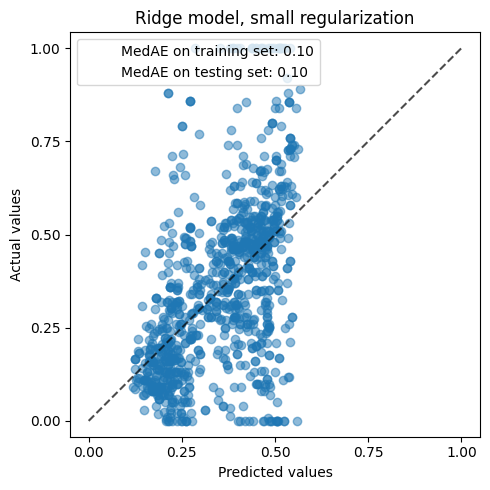

In [70]:
_, ax = plt.subplots(figsize=(5, 5))
display = PredictionErrorDisplay.from_predictions(
    target_test, target_pred, kind="actual_vs_predicted", ax=ax, scatter_kwargs={"alpha": 0.5}
)
ax.set_title("Ridge model, small regularization")
for name, score in scores.items():
    ax.plot([], [], " ", label=f"{name}: {score}")
ax.legend(loc="upper left")
plt.tight_layout()

In [71]:
feature_names = model[:-1].get_feature_names_out()

coefs = pd.DataFrame(
    model[-1].regressor_.coef_,
    columns=["Coefficients"],
    index=feature_names,
)

coefs

,Coefficients
risk_adjustment_average,0.020990
adjust_payoff_total,0.005827
risk_distribution_bimodal,0.082914
risk_distribution_normal,-0.155838
risk_distribution_skewed left,0.140480
risk_distribution_skewed right,-0.122206
risk_distribution_uniform,0.021653
grid_size,-0.001389
hawk_odds,0.138495
play_neighborhood,-0.001303


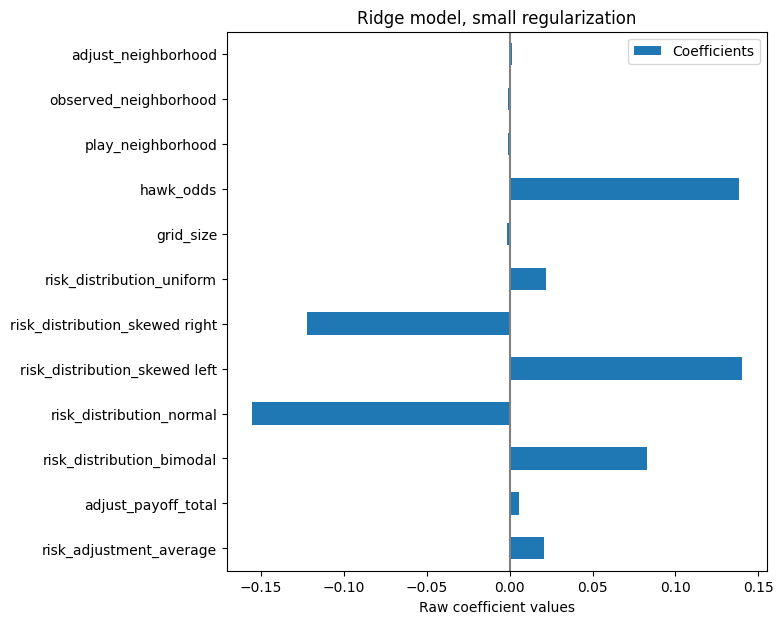

In [72]:
coefs.plot.barh(figsize=(9, 7))
plt.title("Ridge model, small regularization")
plt.axvline(x=0, color=".5")
plt.xlabel("Raw coefficient values")
plt.subplots_adjust(left=0.3)

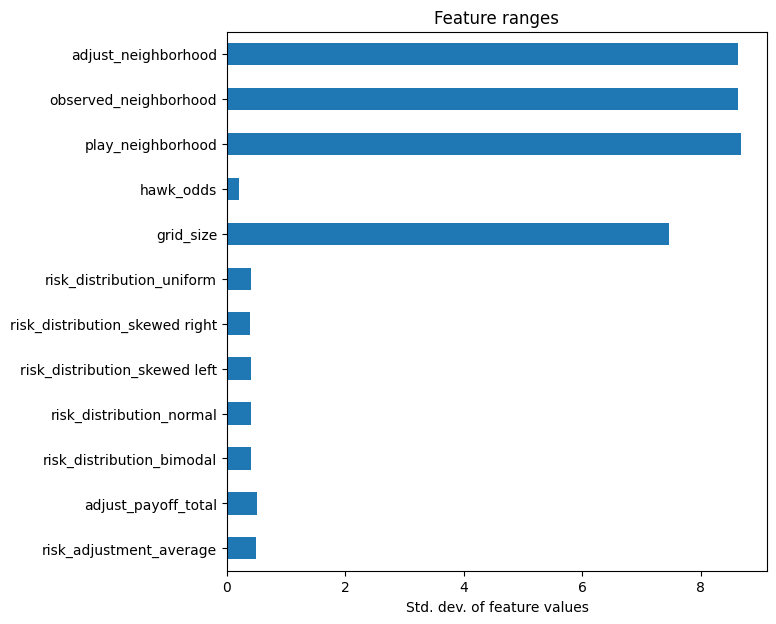

In [73]:
input_train_preprocessed = pd.DataFrame(
    model[:-1].transform(input_train), columns=feature_names
)

input_train_preprocessed.std(axis=0).plot.barh(figsize=(9, 7))
plt.title("Feature ranges")
plt.xlabel("Std. dev. of feature values")
plt.subplots_adjust(left=0.3)

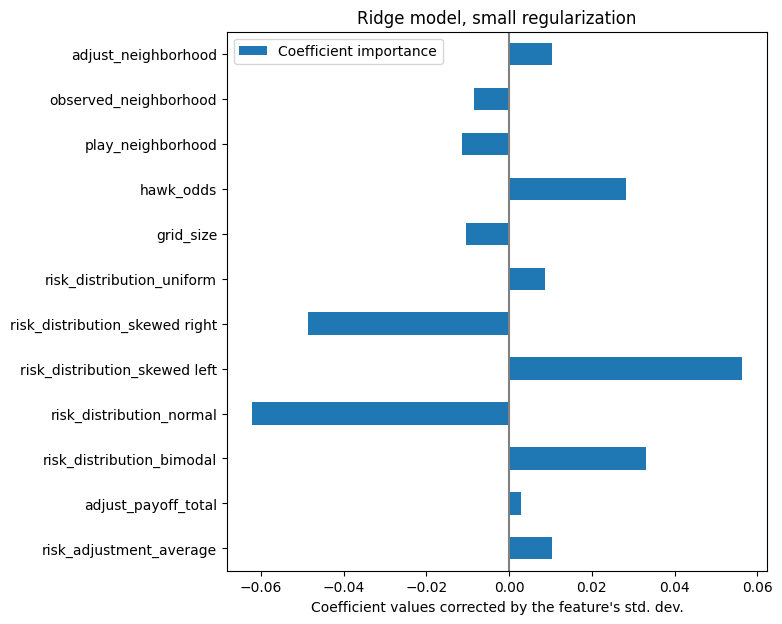

In [74]:
coefs = pd.DataFrame(
    model[-1].regressor_.coef_ * input_train_preprocessed.std(axis=0),
    columns=["Coefficient importance"],
    index=feature_names,
)
coefs.plot(kind="barh", figsize=(9, 7))
plt.xlabel("Coefficient values corrected by the feature's std. dev.")
plt.title("Ridge model, small regularization")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)

In [75]:
from sklearn.model_selection import RepeatedKFold, cross_validate

cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=0)
cv_model = cross_validate(
    model,
    df_input,
    target,
    cv=cv,
    return_estimator=True,
    n_jobs=2,
)

coefs = pd.DataFrame(
    [
        est[-1].regressor_.coef_ * est[:-1].transform(df_input.iloc[train_idx]).std(axis=0)
        for est, (train_idx, _) in zip(cv_model["estimator"], cv.split(df_input, target))
    ],
    columns=feature_names,
)

/Users/rkoeser/workarea/env/simrisk/lib/python3.12/site-packages/scipy/_lib/_util.py:1226: LinAlgWarning: Ill-conditioned matrix (rcond=2.46716e-17): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
/Users/rkoeser/workarea/env/simrisk/lib/python3.12/site-packages/scipy/_lib/_util.py:1226: LinAlgWarning: Ill-conditioned matrix (rcond=8.45374e-17): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
/Users/rkoeser/workarea/env/simrisk/lib/python3.12/site-packages/scipy/_lib/_util.py:1226: LinAlgWarning: Ill-conditioned matrix (rcond=9.26618e-17): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
/Users/rkoeser/workarea/env/simrisk/lib/python3.12/site-packages/scipy/_lib/_util.py:1226: LinAlgWarning: Ill-conditioned matrix (rcond=9.81204e-17): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)


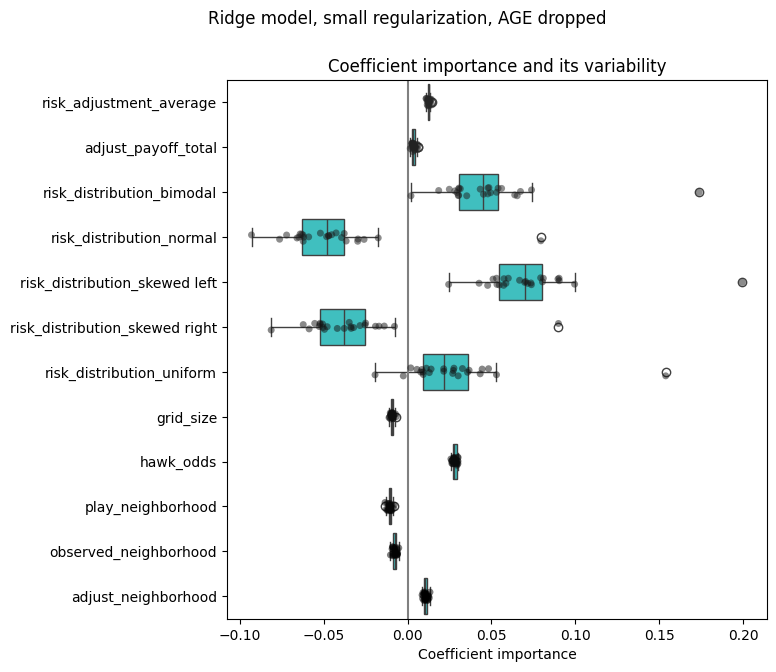

In [76]:
plt.figure(figsize=(9, 7))
sns.stripplot(data=coefs, orient="h", palette="dark:k", alpha=0.5)
sns.boxplot(data=coefs, orient="h", color="cyan", saturation=0.5)
plt.axvline(x=0, color=".5")
plt.title("Coefficient importance and its variability")
plt.xlabel("Coefficient importance")
plt.suptitle("Ridge model, small regularization, AGE dropped")
plt.subplots_adjust(left=0.3)